In [2]:
# import test_tensor_2d as tt ttbd
import quimb.tensor as qtn
import quimb as qu
import matplotlib.pyplot as plt
import numpy as np
from importlib import reload

import spinlessQubit as sq
import hubbardAnalytical as han

In [132]:
reload(sq)
sql = sq.SpinlessQubitLattice()
sql.t_make_stabilizers()

1-----2
|     |
4-----5
None None 6 None


In [999]:
reload(sq)
reload(han)

##Testing params
T_PARAM=1
V_PARAM=0
MU_PARAM=0
LX, LY = 2, 3


### Analytical Hubbard Hamiltonian
hub = han.FermiHubbardSpinless(Lx=LX, Ly=LY)
hub.build_spinless_ham(t=T_PARAM, V=V_PARAM, mu=MU_PARAM)
Hexact = hub._Ham.copy()
gex, gsx = qu.eigh(Hexact)
print('Exact:  {}'.format(gex[0:10]))
nx = hub.stateOccs(state=gsx[:,0])
print(nx)


### Qubit lattice Hamiltonian
sql = sq.SpinlessQubitLattice(Lx=LX,Ly=LY)
sql.make_simulator_ham(t=T_PARAM, V=V_PARAM, mu=MU_PARAM)
sql.make_stabilizer()
Hsim = sql.ham_sim()

# ###
# print('\nPROJECTION 2\n')
# ###
# pHam = sql.projected_ham_2()
# Vpos = sql._pVecs
# newpvals, npes = qu.eigh(pHam)
# wgs = npes[:,0]
# print(newpvals[0])
# print(sql.state_local_occs(k=None, state=Vpos@wgs)[0])


###
print('\nROTATION 3\n')
###
rotHam = sql.projected_ham_3() #in "rotated" basis
Uplus = sql._Uplus
rens, reigst = qu.eigh(rotHam)
print(rens[0:10])
print(sql.state_local_occs(k=None, state=Uplus@reigst[:,0]))

Edge 3,0
Edge 5,2
Edge 1,4
Edge 2,1
Edge 1,0
Exact:  [-3.46542959 -2.97875534 -2.97875534 -2.31336716 -2.28824561 -2.28824561
 -2.17008649 -1.93185165 -1.93185165 -1.84775907]
[[0.5 0.5 0.5]
 [0.5 0.5 0.5]]
2--h-->1   (None)
1--h-->0,  face 6
3--v-->0,  face 6
5--v-->2   (None)
1--v-->4,  face 6

ROTATION 3

[-3.44948974 -2.93185165 -2.93185165 -2.44948974 -2.44948974 -2.41421356
 -1.93185165 -1.93185165 -1.93185165 -1.93185165]
[[0.5 0.5 0.5]
 [0.5 0.5 0.5]]


In [1000]:
rh1 = sql.projected_ham_3()
rh2 = sql._HamProj

np.array_equal(rh1,rh2)

True

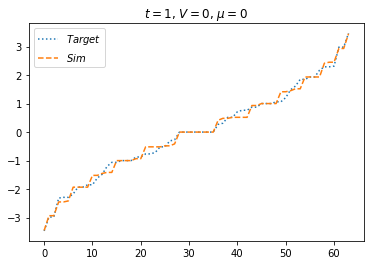

In [1001]:
plt.plot(gex, ':', label=r'$Target$') #exact Hubbard energies
# plt.plot(newpvals, '--',label=r'$Sim$')
plt.plot(rens, '--',label=r'$Sim$')

plt.title(r'$t={}$, $V={}$, $\mu={}$'.format(T_PARAM,V_PARAM,MU_PARAM))
plt.legend()


In [988]:
diff = (Hexact - rotHam).round(2)
ii,jj = np.where(diff)
difflist=[]
for k in range(ii.size):
    check = (ii[k],jj[k])
    difflist.append(check)
    # print(Hexact[check], rotHam[check])
    # print(check)
difflist=np.array(difflist)
print(difflist[:5])
# check=(2,16)


[[ 1  8]
 [ 2 16]
 [ 3 10]
 [ 4 32]
 [ 5 12]]


In [990]:
print(sql.state_local_occs(state=Uplus[:,3]))
print(sql.state_local_occs(state=Uplus[:,10]))

# print(hub.stateOccs(qu.basis_vec(i=3, dim=64)))
# print(hub.stateOccs(qu.basis_vec(i=10, dim=64)))

# xx = qu.ikron(qu.pauli('x'), dims=sql._dims, inds=[6])
print(qu.expec(xx, Uplus[:,3]))


[[0. 0. 0.]
 [0. 1. 1.]]
[[0. 0. 1.]
 [0. 1. 0.]]
0.9999999999999998


In [991]:
wh=2
print(gex[wh], rens[wh], end='\n\n')
print(hub.stateOccs(gsx[:,wh]), end='\n\n')
# qstates = Uplus@reigst
print(sql.state_local_occs(state=qstates[:,wh]), end='\n\n')

-2.978755335069902 -2.9318516525781346

[[0.4344854  0.40506433 0.4344854 ]
 [0.27785379 0.1702573  0.27785379]]

[[0.55283122 0.60566243 0.55283122]
 [0.69716878 0.89433757 0.69716878]]



In [992]:

for k in range(64):
    A = hub.stateOccs(qu.basis_vec(i=k, dim=64))
    B = sql.state_local_occs(state=Uplus[:,k])
    assert np.allclose(A,B)
    # print(A,end='\n\n')
    # print(B,end='\n\n...\n\n')
wh=2    
# print(hub.stateOccs(Hexact@qu.basis_vec(i=2, dim=64)))
print(hub.stateOccs(Hexact[:,2]))
print(sql.state_local_occs(state=Uplus@rotHam[:,2], faces=0))
# Hexact[:,2]
sql.faceX(Uplus@rotHam[:,2])

[[0. 1. 0.]
 [0. 0. 0.]]
[[0. 1. 0.]
 [0. 0. 0.]]


-0.9999999999999996